# Visualising 2D data

For this example, we'll use the Meteor Impact data from NASA, available here:
https://www.kaggle.com/nasa/meteorite-landings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

df = pd.read_csv("meteorite-landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [3]:
df = df.dropna(subset=["reclong", "reclat"]) #dropna is get rid of non number values
df = df[df.reclong < 300]#get rid of higher than 300 longitude
#always good to look at info() to see if any data is missing, looking at info shows that there are 7k missing entries that have no reclat, reclong

## 2D Histograms

The staple

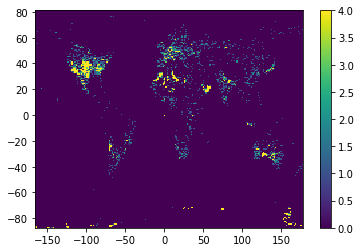

In [4]:
plt.hist2d(df.reclong, df.reclat, bins=200, vmax=4)
plt.colorbar(); #adds the colorbar

## 2D Hex plots

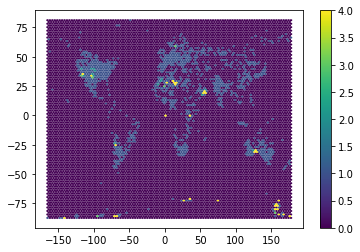

In [6]:
plt.hexbin(df.reclong, df.reclat, bins=200, vmax=4, lw=0.0)
plt.colorbar();

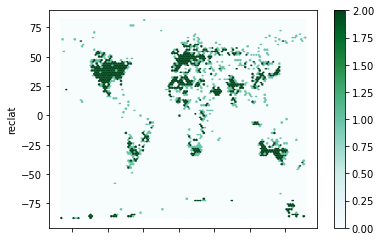

In [7]:
df.plot.hexbin(x="reclong", y="reclat", vmax=2, gridsize=100, linewidth=0.25);

## Contour

It's easiest to show these plots using data with broader shapes, so let's make some.

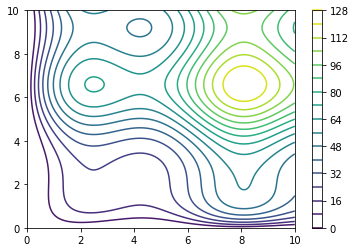

In [8]:
spacing = np.linspace(0, 10, 200)
X, Y = np.meshgrid(spacing, spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

plt.contour(X, Y, Z, levels=20)
plt.colorbar();

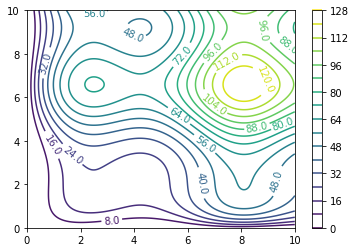

In [9]:
c = plt.contour(X, Y, Z, levels=20)
plt.clabel(c, inline=True, fmt="%0.1f")
plt.colorbar();

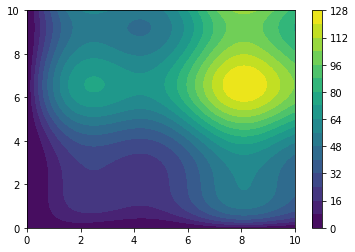

In [10]:
c = plt.contourf(X, Y, Z, levels=20)
plt.colorbar();

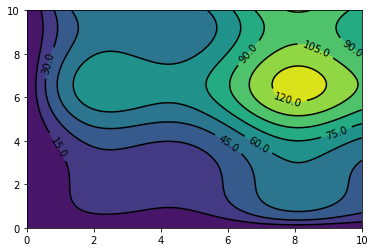

In [11]:
plt.contourf(X, Y, Z, levels=10)
c = plt.contour(X, Y, Z, levels=10, colors="black")
plt.clabel(c, inline=True, fmt="%0.1f");

## KDE

To look at KDE, let me quickly draw some samples from the above surface

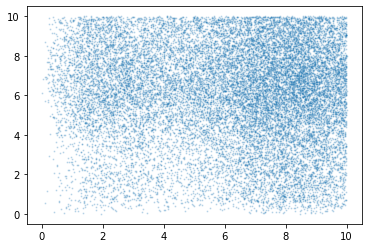

In [12]:
# This is called rejection sampling, a way to brute force sample any surface, so long
# as you're fine waiting for slow code
n = 50000
xs, ys = np.random.uniform(0, 10, n), np.random.uniform(0, 10, n)
zs = (np.sin(xs) + np.cos(ys) + 2 * np.arcsinh(xs * ys))**2
zs /= zs.max()
passed = np.random.uniform(0, 1, n) < zs
xs, ys = xs[passed], ys[passed]
plt.scatter(xs, ys, s=1, alpha=0.2);

/Users/Sarah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


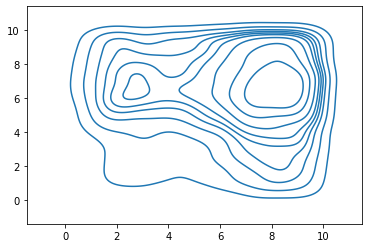

In [13]:
sb.kdeplot(xs, ys);

/Users/Sarah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Sarah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 2.0 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


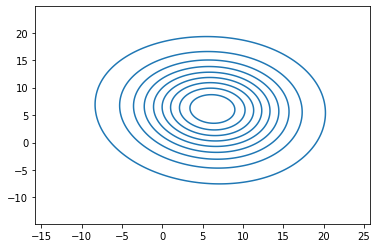

In [14]:
sb.kdeplot(xs, ys, bw=2.0);

/Users/Sarah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Sarah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


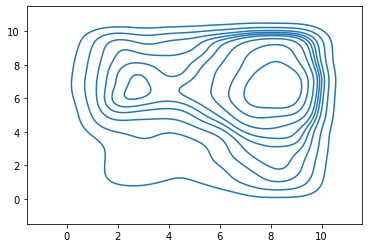

In [15]:
sb.kdeplot(xs, ys, bw=0.2);

## Jointplots

Joint plots allow you to swap out the interior and marginal plots to get something the perfectly suits your needs.

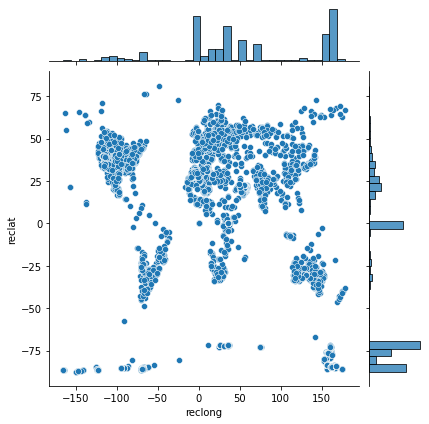

In [16]:
sb.jointplot(data=df, x="reclong", y="reclat");
#scatterplot in middle and histogram on side

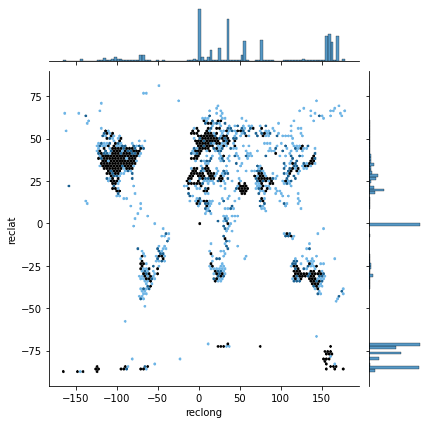

In [17]:
sb.jointplot(data=df, x="reclong", y="reclat", kind="hex", 
             gridsize=100, vmax=3, linewidth=0, marginal_kws={"bins": 100});

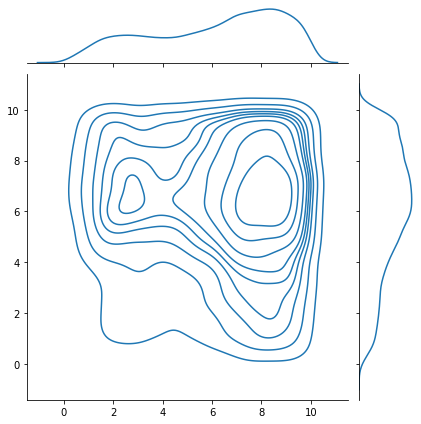

In [18]:
sb.jointplot(x=xs, y=ys, kind="kde");

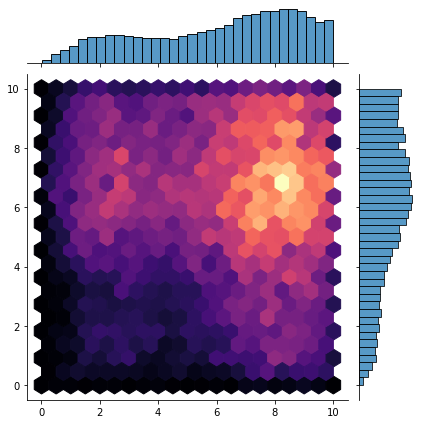

In [19]:
sb.jointplot(x=xs, y=ys, kind="hex", gridsize=20, cmap="magma");

In [ ]:
sb.pairplot(data=df[["reclat", "reclong", "mass"]]);

### Recap

* plt.hist2d
* plt.hexbin
* df.plot.hexbin
* plt.contour
* plt.contourf
* sb.kdeplot
* sb.jointplot